## Decision-Tree-Regressor

#### How does a DT regressor work

Step 1: Data Splitting :
- The Decision Tree Regressor starts by considering the entire dataset and looks for the best feature and split point that minimizes the variability in the target variable
- Splitting Criterion: A common criterion used for splitting is the reduction in Mean Squared Error (MSE). At each node, MSE is calculated
- Calculate MSE for a Node: For any given node 𝑡, the MSE is calculated using the formula:

$$ \text{MSE}(t) = \frac{1}{N_t} \sum_{i \in t} (y_i - \bar{y}_t)^2
 $$

Where:

𝑁
𝑡
 is the number of samples in node 
𝑡
.

𝑦
𝑖
 is the actual value of the target variable for the 
𝑖
-th sample.

𝑦
ˉ
𝑡
 is the mean of the target values in node 
𝑡
, given by:

$$ \bar{y}t = \frac{1}{N_t} \sum{i \in t} y_i $$

Step 2: Choosing the Best Split
- For each possible feature and split point, divide the data into two child nodes, 
𝑡
𝐿
 (left) and 
𝑡
𝑅
 (right). Compute the MSE for each child node.
- The algorithm evaluates all possible splits and chooses the one that minimizes the weighted sum of MSE for the resulting child nodes.
- weighted MSE: For a split resulting in two child nodes 𝑡𝐿 and 𝑡𝑅:
$$ \text{MSE}{\text{split}} = \frac{N{t_L}}{N_t} \text{MSE}(t_L) + \frac{N_{t_R}}{N_t} \text{MSE}(t_R) $$

Where:

𝑁
𝑡
 is the total number of samples in the parent node 
𝑡
.

𝑁
𝑡
𝐿
 and 
𝑁
𝑡
𝑅
 are the number of samples in the left and right child nodes, respectively.

MSE
(
𝑡
𝐿
)
 and 
MSE
(
𝑡
𝑅
)
 are the MSEs of the left and right child nodes, respectively.
 
The split that results in the lowest MSE split  is chosen.

Step 3: Creating Leaf Nodes
- When further splitting does not significantly reduce the MSE, the algorithm stops and creates leaf nodes. Each leaf node represents a predicted value, which is the average of the target values in that subset.
- Recursively Split: Repeat the process for each child node until a stopping criterion is met (e.g., maximum depth, minimum number of samples per leaf, or no further reduction in MSE).
  
Step 4: Making Predictions
- To make a prediction for a new sample, the model traverses the tree from the root to a leaf node, following the decisions at each node based on the feature values. The final prediction is the value at the leaf node.

#### Example Illustration:

1. Root Node Calculation:
Assume we have a node 𝑡 with 5 samples: 
[2, 3, 5, 6, 7].

The mean 𝑦ˉ𝑡 is: $$ 𝑦ˉ𝑡 = 1/5(𝑦1+𝑦2+𝑦3+𝑦4+𝑦5)  = (2+3+5+6+7) / 5 = 4.6 $$

The MSE at the root node is: $$ MSE(𝑡)=1/5 [(𝑦1−𝑦ˉ𝑡)^2+(𝑦2−𝑦ˉ𝑡)^2+(𝑦3−𝑦ˉ𝑡)^2+(𝑦4−𝑦ˉ𝑡)^2+(𝑦5−𝑦ˉ𝑡)^2] 
= (1/5)[(2-4.6)^2+(3-4.6)^2+(5-4.6)^2+(6-4.6)^2+(7-4.6)^2] = 3.44 $$ 

2. Child Node Calculation:
- Splitting the Data: Let's assume we decide to split the data into two subsets: 
{2,3} and {5,6,7}.

- Calculate the mean (𝑦ˉ𝑡𝐿) and MSE for the left child node 𝑡𝐿: Left child samples : 2, 3
- ytL = (2+3)/2 = 5/2 = 2.5

The MSE for left child:

$$ \text{MSE}(t_L) = \frac{1}{3} \left[ (y_1 - \bar{y}{t_L})^2 + (y_2 - \bar{y}{t_L})^2 + (y_3 - \bar{y}_{t_L})^2 \right] = (1/2)[(2-2.5)^2+(3-2.5)^2]= 0.25$$

The mean for right child 𝑦ˉ𝑡𝑅: {5, 6, 7} 𝑦ˉ𝑡𝑅= 1/3(5+6+7) = 18/3 = 6

The MSE for right child:

$$ \text{MSE}(t_R) = \frac{1}{2} \left[ (y_4 - \bar{y}{t_R})^2 + (y_5 - \bar{y}{t_R})^2 \right] = (1/3)[(5-6)^2+(6-6)^2+(7-6)^2] = 0.67 $$


Weighted MSE Calculation:  MSE split 

$$ \text{MSE}{\text{split}} = \frac{2}{5} \text{MSE}(t_L) + \frac{3}{5} \text{MSE}(t_R) = (2/5)*0.25+(3/5)*0.67 = 0.502$$

- By iteratively performing these calculations and choosing the splits that minimize the weighted MSE, the decision tree regressor efficiently learns to predict continuous values.

- Since the split reduces the overall MSE from 
3.44
 to approximately 
0.502
, it indicates that this split significantly improves the homogeneity of the target values within the child nodes.

3. Predicted Targets:
- For samples 2 and 3, the predicted target is the mean of 𝑡𝐿: 𝑦ˉ𝑡𝐿=2.5
- For samples 5,6,7, the predicted target is the mean of 𝑡𝑅: 𝑦ˉ𝑡𝑅=6

Mean Squared Error: 0.5211
Mean Absolute Error: 0.5276
R^2 Score: 0.6030


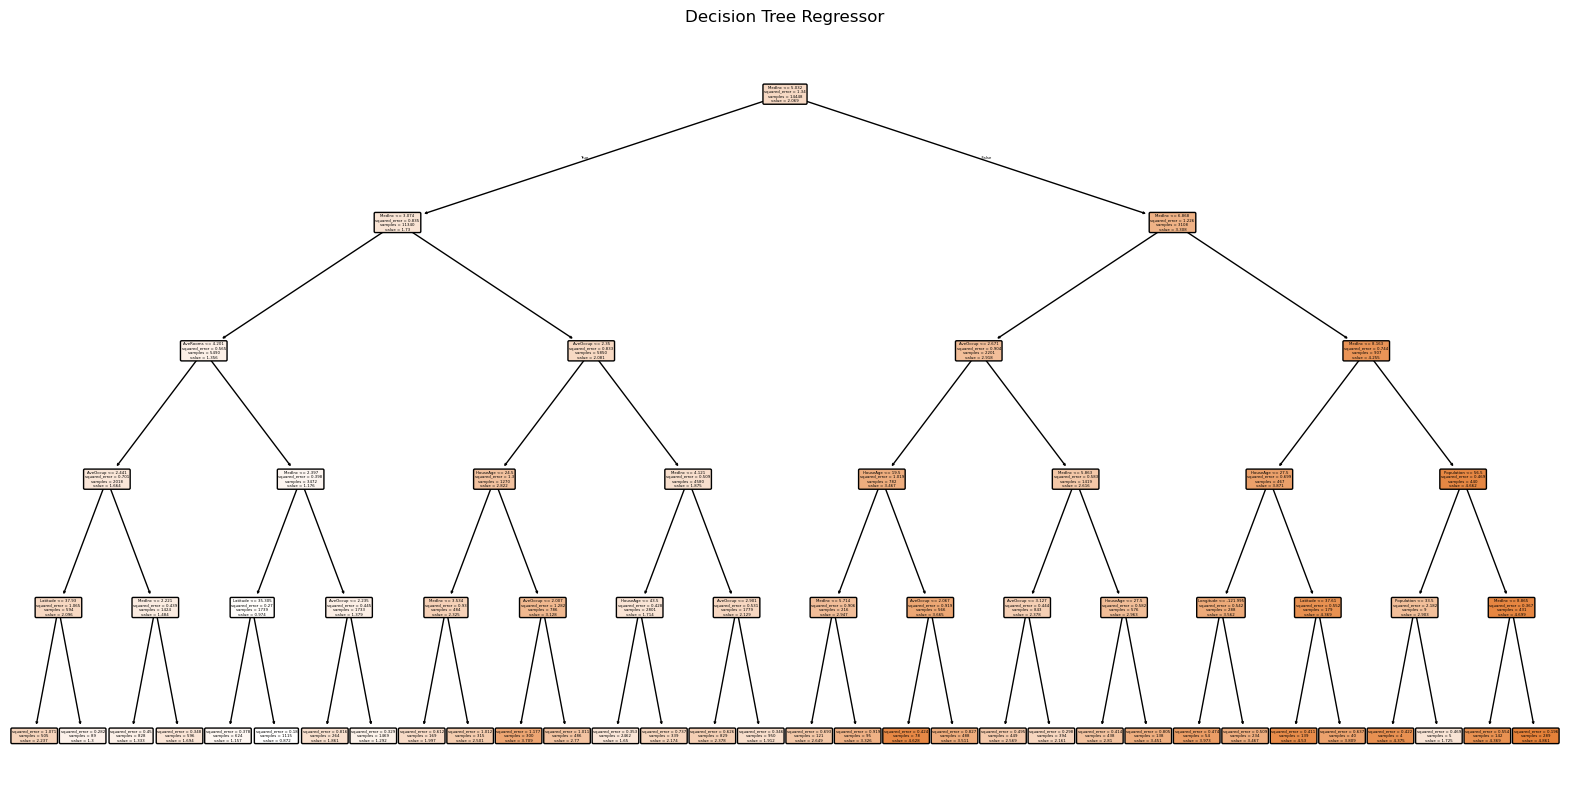

C:\Users\Sadiq Pasha\AppData\Local\Temp\ipykernel_42672\2593062030.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


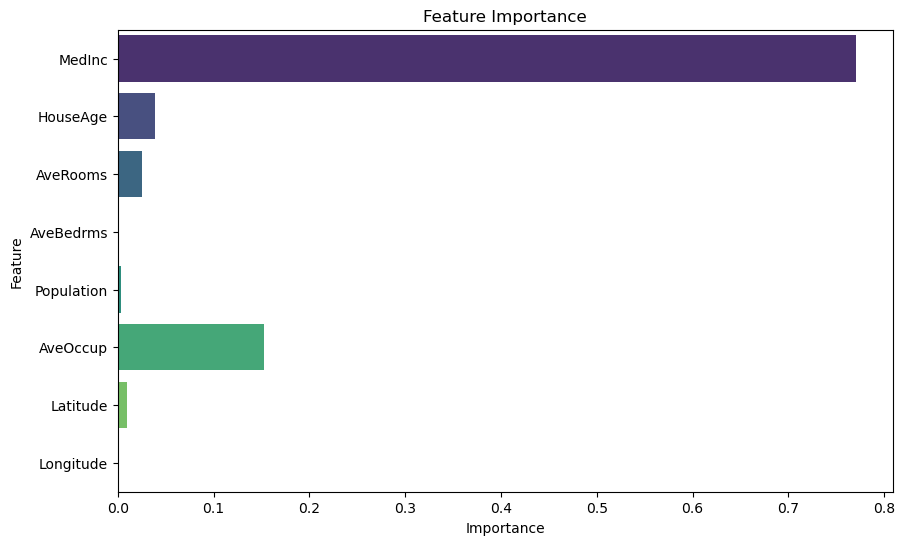

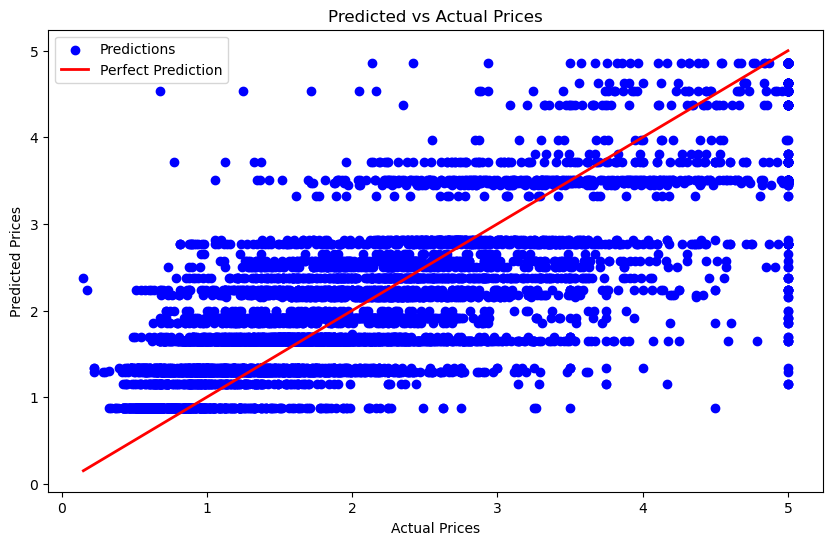

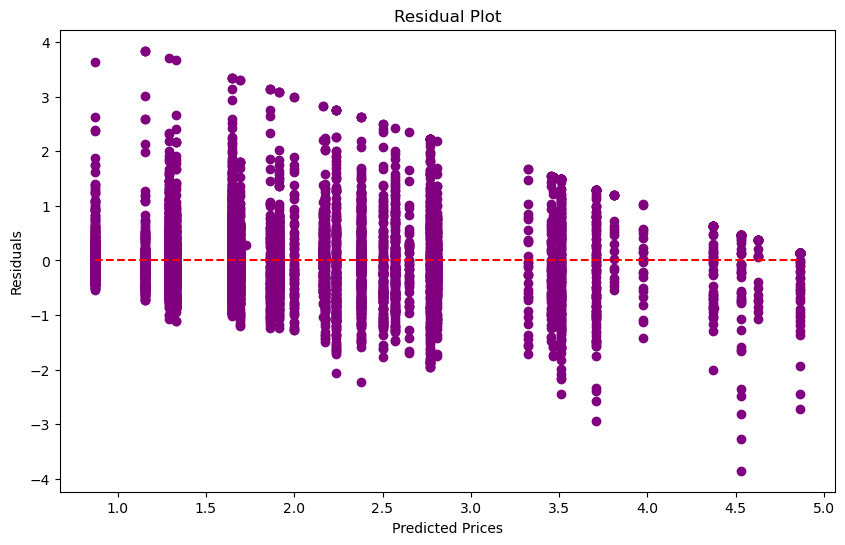

C:\Users\Sadiq Pasha\AppData\Local\Temp\ipykernel_42672\2593062030.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(features)[sorted_idx])


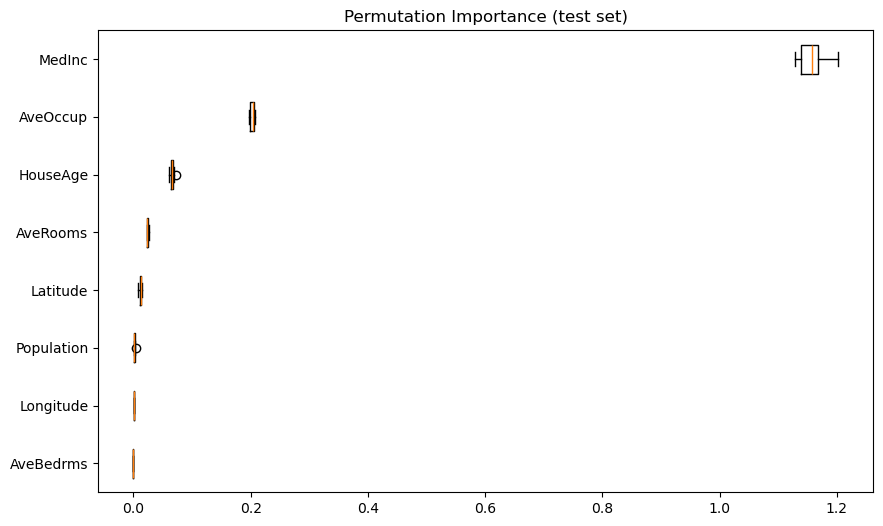

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Load the dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=california.feature_names, filled=True, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()

# Plot feature importance
feature_importances = regressor.feature_importances_
features = california.feature_names

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyles='dashed')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Permutation Importance
perm_importance = permutation_importance(regressor, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(features)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()


### Key Assumptions for using DT regressor

1. Homogeneous Groups: Decision trees assume that the data can be split into homogeneous groups. This means that within each subset, the target variable has minimal variance and the samples are similar.

2. Additive Structure: The model assumes that the relationships between features and the target variable are additive, meaning that the effect of one feature can be added to the effect of another feature.

3. Feature Interactions: Decision trees naturally handle feature interactions. This means they can capture complex relationships between features without needing explicit interaction terms.

4. Non-Linearity: Decision trees do not assume a linear relationship between the features and the target variable. They are capable of modeling non-linear relationships.

5. Stationarity: The decision tree assumes that the underlying patterns in the data are stable and do not change over time. This is important for time series data.

6. Independence of Observations: Each observation (sample) is assumed to be independent of the others. This means that the value of one observation does not depend on the value of another.

7. No Multicollinearity: While decision trees can handle correlated features, extreme multicollinearity can still affect the model's performance. It's often useful to remove or combine highly correlated features.

8. Completeness of Data: The model performs best with complete data. Handling missing values appropriately is important, although decision trees can handle missing values to some extent.

9. Sufficient Data: Having a sufficient amount of data is crucial for training a decision tree. Small datasets can lead to overfitting, where the tree fits the training data too closely and performs poorly on unseen data.

10. Balanced Data: While decision trees can handle imbalanced datasets, very imbalanced data can lead to biased results. Techniques like resampling or using balanced metrics can help address this issue.